# Highpass Filtering Demo
High-pass filters attenuate values **below** a threshold/cutoff, while leaving higher values alone. This is the opposite of a low-pass filter.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import spatial_filtering_funcs as fs
import SpatialFilter as filters

In [3]:
# Function: plot two original image next to processed image
def plot_imgs(img1=None, title1='', img2=None, title2=''):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    ax = axes.ravel()

    # Original
    ax[0].imshow(img1, cmap='gray')
    ax[0].set_title(title1)

    # Filtered
    ax[1].imshow(img2, cmap='gray')
    ax[1].set_title(title2)

    plt.tight_layout()
    plt.show()

In [4]:
img = cv2.imread('butterfly.png', 0)

In [5]:
kernels = filters.SpatialFilter()

In [6]:
# Apply laplacian filter
kernel = kernels.laplacian1
laplacian = fs.convolution_2d(img, kernel, flip_filter=True)

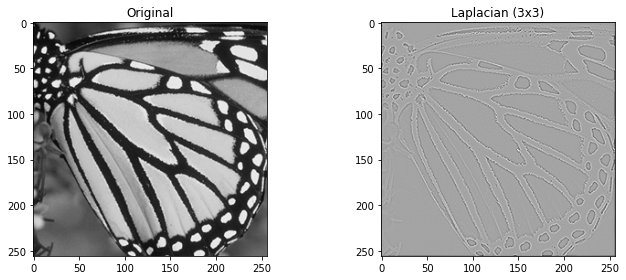

In [7]:
plot_imgs(
    img1=img,
    title1='Original',
    img2=laplacian, 
    title2='Laplacian (3x3)'
)

In [8]:
# Sharpen image using unsharp masking technique
img2 = cv2.imread('pepper.png', 0)

In [9]:
img2 = fs.convolution_2d(image=img2, w=fs.get_gaussian_filter(k=7, stdev=1), scale=False, flip_filter=False)

In [10]:
w = fs.get_gaussian_filter(k=19, stdev=3)
unsharp_mask_weight = 2
sharp = fs.sharpen(img=img2, smoothing_filter=w, contrib_const=unsharp_mask_weight)

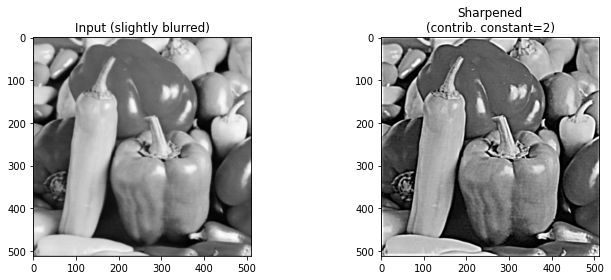

In [11]:
plot_imgs(
    img1=img2,
    title1='Input (slightly blurred)',
    img2=sharp, 
    title2='Sharpened\n(contrib. constant={})'.format(unsharp_mask_weight)
)